<a href="https://colab.research.google.com/github/srtaksande/MachineLearning/blob/main/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/accepted.csv", sep=',')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
681929,81394265,NaN,12000.0,12000.0,12000.0,36 months,16.29,423.61,D,D1,College Access Facilitator,< 1 year,RENT,44850.0,Source Verified,Jun-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,606xx,IL,9.59,0.0,Sep-2004,675.0,679.0,2.0,60.0,NaN,10.0,0.0,9114.0,49.3,16.0,f,1236.85,1236.85,...,20823.0,9498.0,5500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
660517,83234666,NaN,28000.0,28000.0,28000.0,36 months,7.99,877.29,A,A4,Scientist,1 year,RENT,98000.0,Verified,Jun-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,947xx,CA,21.55,0.0,Jun-2000,700.0,704.0,0.0,NaN,NaN,16.0,0.0,29501.0,34.5,33.0,w,2597.17,2597.17,...,165993.0,104075.0,85600.0,80393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1382877,144518266,NaN,10000.0,10000.0,10000.0,36 months,14.47,344.07,C,C2,Driver,9 years,MORTGAGE,55000.0,Verified,Dec-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,385xx,TN,22.08,0.0,Jul-2002,670.0,674.0,2.0,NaN,NaN,11.0,0.0,12183.0,43.5,14.0,w,9089.75,9089.75,...,211399.0,46278.0,17900.0,36599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1262354,17984400,NaN,19200.0,19200.0,19200.0,36 months,18.99,703.70,E,E1,AA,2 years,RENT,70000.0,Not Verified,Jun-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,016xx,MA,12.41,0.0,Oct-1986,680.0,684.0,1.0,31.0,NaN,11.0,0.0,9543.0,73.4,30.0,f,0.00,0.00,...,25920.0,19453.0,5200.0,12920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2246021,91454013,NaN,10000.0,10000.0,10000.0,36 months,11.49,329.72,B,B5,maintenance technician,2 years,MORTGAGE,45000.0,Not Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,622xx,IL,28.21,0.0,Dec-1997,695.0,699.0,1.0,NaN,110.0,6.0,1.0,10234.0,76.4,10.0,w,2221.82,2221.82,...,95638.0,39875.0,12000.0,41238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
726181,74561538,NaN,16000.0,16000.0,16000.0,60 months,19.99,423.82,E,E1,Branch manager,10+ years,RENT,107000.0,Not Verified,Apr-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,cr

In [ ]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
df= df.drop(columns=['member_id','url','desc','mths_since_last_record','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line',
                      'sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts',
                      'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_flag','hardship_type',
                      'hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
                      'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_payoff_balance_amount',
                      'debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','hardship_last_payment_amount'])

In [ ]:
column = (df.columns.values.tolist())
print(column)

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_a

In [ ]:
import re
term = df['term']
print(term)
pattern = 'months'



0           36 months
1           36 months
2           60 months
3           60 months
4           60 months
              ...    
2260696     60 months
2260697     60 months
2260698     60 months
2260699           NaN
2260700           NaN
Name: term, Length: 2260701, dtype: object


In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,...,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,...,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,...,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,...,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,...,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N


In [ ]:
for i in column:
   df.dropna(subset = [i], inplace=True)
df.isnull().sum()



id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
debt_settlement_flag          0
Length: 113, dtype: int64

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
3904,68394211,22450.0,22450.0,22450.0,60 months,21.48,613.43,E,E5,maintenance,1 year,MORTGAGE,24000.0,Verified,Dec-2015,Current,n,other,Other,479xx,IN,28.10,1.0,Mar-1997,670.0,674.0,0.0,13.0,9.0,4.0,3207.0,22.3,35.0,w,10659.03,10659.03,23896.98,23896.98,11790.97,12106.01,...,11.0,7.0,7037.0,9452.0,21.9,0.0,0.0,138.0,225.0,7.0,7.0,4.0,17.0,74.0,10.0,74.0,2.0,3.0,6.0,3.0,12.0,7.0,7.0,24.0,6.0,8.0,0.0,0.0,0.0,2.0,90.0,0.0,4.0,0.0,102096.0,24452.0,12100.0,23696.0,Cash,N
7220,67949516,25000.0,25000.0,25000.0,60 months,11.22,546.31,B,B5,6th Grade Teacher,9 years,MORTGAGE,55000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,605xx,IL,27.17,1.0,Mar-1998,705.0,709.0,0.0,21.0,12.0,0.0,26818.0,61.2,41.0,w,10817.62,10817.62,20758.99,20758.99,14182.38,6576.61,...,2.0,1.0,36071.0,15208.0,62.2,0.0,0.0,136.0,200.0,54.0,10.0,2.0,81.0,21.0,10.0,21.0,2.0,3.0,6.0,4.0,8.0,20.0,7.0,18.0,6.0,12.0,0.0,0.0,0.0,1.0,92.1,25.0,0.0,0.0,461628.0,114060.0,40200.0,100828.0,Cash,N
8529,67999377,28000.0,28000.0,28000.0,60 months,13.18,639.67,C,C3,Transportation Coordinator,8 years,MORTGAGE,70000.0,Source Verified,Dec-2015,Current,n,credit_card,Credit card refinancing,740xx,OK,19.08,0.0,Aug-2002,685.0,689.0,0.0,29.0,10.0,0.0,17843.0,98.6,28.0,w,11938.19,11938.19,24895.87,24895.87,16061.81,8834.06,...,0.0,3.0,17158.0,188.0,98.9,0.0,0.0,134.0,160.0,16.0,14.0,7.0,20.0,29.0,16.0,29.0,0.0,4.0,5.0,5.0,12.0,8.0,6.0,13.0,5.0,10.0,0.0,0.0,0.0,0.0,92.9,100.0,0.0,0.0,184400.0,36665.0,17800.0,46388.0,Cash,N
10840,68018281,29000.0,29000.0,28825.0,60 months,18.20,739.57,E,E1,Maintenance Tech,1 year,MORTGAGE,55000.0,Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,042xx,ME,26.90,0.0,Sep-2002,675.0,679.0,0.0,50.0,7.0,0.0,5225.0,93.3,29.0,f,13215.58,13135.83,28769.92,28596.31,15784.42,12985.50,...,1.0,3.0,22026.0,375.0,93.3,1.0,0.0,151.0,159.0,22.0,2.0,4.0,22.0,50.0,4.0,50.0,3.0,3.0,3.0,3.0,10.0,12.0,3.0,13.0,3.0,7.0,0.0,0.0,0.0,1.0,79.3,100.0,0.0,0.0,174470.0,41311.0,5600.0,56001.0,Cash,N
13700,67495417,28000.0,28000.0,28000.0,60 months,18.20,714.07,E,E1,Partner,9 years,RENT,17000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,891xx,NV,136.97,0.0,Apr-2000,675.0,679.0,1.0,59.0,6.0,1.0,9784.0,32.1,17.0,f,13272.76,13272.76,27063.88,27063.88,14727.24,12336.64,...,1.0,5.0,17032.0,20716.0,32.1,0.0,0.0,114.0,188.0,4.0,4.0,2.0,4.0,64.0,4.0,64.0,5.0,3.0,3.0,3.0,10.0,4.0,3.0,11.0,3.0,6.0,0.0,0.0,0.0,1.0,60.0,0.0,1.0,0.0,139800.0,102192.0,30500.0,109300.0,Cash,N


In [ ]:
df.to_csv (r'C:\Users\Sandeep\OneDrive\Desktop\Extra\accepted_lending_club.csv', index = False, header=True)
print(df)

               id  loan_amnt  ...  disbursement_method  debt_settlement_flag
3904     68394211    22450.0  ...                 Cash                     N
7220     67949516    25000.0  ...                 Cash                     N
8529     67999377    28000.0  ...                 Cash                     N
10840    68018281    29000.0  ...                 Cash                     N
13700    67495417    28000.0  ...                 Cash                     N
...           ...        ...  ...                  ...                   ...
2257822  90694013    20000.0  ...                 Cash                     N
2257939  90220155    11150.0  ...                 Cash                     N
2259187  90405480    16000.0  ...                 Cash                     N
2260259  90413922    25000.0  ...                 Cash                     N
2260415  90386210    35000.0  ...                 Cash                     N

[6078 rows x 113 columns]


In [ ]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6.078000e+03,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.0,6078.0,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.0,6078.000000,6078.000000,6078.000000,6078.000000,6.078000e+03,6078.000000,6078.000000,6078.000000,...,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6078.000000,6.078000e+03,6.078000e+03,6078.000000,6078.000000
mean,18721.915104,18721.915104,18717.382363,15.143636,547.621482,69250.318996,29.645387,0.805528,686.681474,690.681474,0.553801,33.119283,12.148733,0.116321,1.305388e+04,50.032182,27.320171,14091.560805,14088.753233,7343.280230,7340.814131,4630.354299,2710.867221,2.058710,0.0,0.0,599.578991,687.833498,683.344850,0.015630,45.954261,1.0,131929.636170,18.749023,0.001810,395.386147,1.965096e+05,1.100526,3.528134,0.878249,...,1.555610,1.809312,2.814413,5.105791,18397.028792,7423.120928,57.468444,0.025995,9.425633,139.738565,206.006088,13.324613,6.623725,1.962817,26.843699,43.809641,6.736591,39.853241,2.223593,3.231491,5.255018,4.089174,7.786936,10.355216,7.773445,14.772458,5.269497,12.118295,0.000329,0.001481,0.268509,2.458539,81.414972,41.299622,0.078809,0.025995,2.364145e+05,6.179115e+04,15910.891741,62052.111221
std,10176.890035,10176.890035,10176.103614,5.213572,299.944126,43537.445686,30.258535,1.519666,21.681098,21.681098,0.800681,20.964895,5.496293,0.447832,2.166276e+04,24.347660,11.406494,8780.140005,8780.384143,6160.405946,6157.473611,4438.385333,2464.413249,14.481474,0.0,0.0,964.781692,44.904740,49.423614,0.133012,21.595277,0.0,61259.718881,7.116416,0.042507,1893.902947,1.644010e+05,1.204838,3.031639,1.005162,...,1.831233,2.940471,2.811582,3.298116,16854.331217,10471.261706,28.856248,0.178622,493.418565,49.108152,91.077310,17.066956,6.028625,1.769115,39.057873,22.937455,5.701610,22.664581,2.246132,2.120730,3.227910,2.585439,4.141505,7.643575,4.588928,7.631576,3.235391,5.496958,0.018138,0.038455,0.888353,2.009319,11.807348,36.497298,0.281995,0.312615,1.808450e+05,5.330546e+04,15006.982846,49609.297193
min,1000.000000,1000.000000,1000.000000,5.310000,31.040000,70.000000,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,4.000000,0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6078 entries, 3904 to 2260415
Columns: 113 entries, id to debt_settlement_flag
dtypes: float64(89), object(24)
memory usage: 5.3+ MB


In [ ]:
df.grade.value_counts()

C    2244
B    1467
D    1278
A     514
E     423
F     103
G      49
Name: grade, dtype: int64

Text(0.5, 1.0, 'Grade Count')

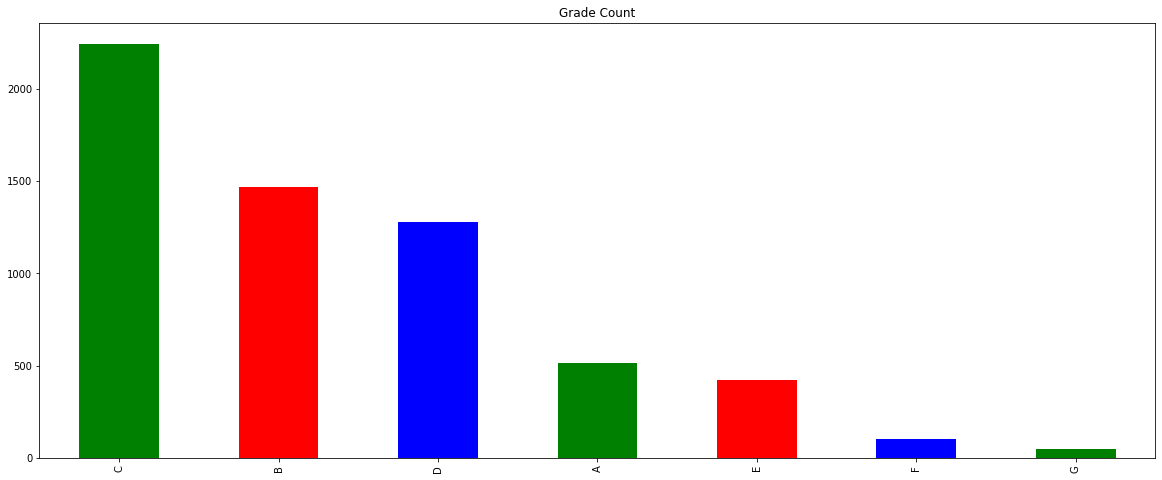

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grade = df.grade.value_counts()
grade.plot(kind='bar',figsize=(20,8), color=['green','red','blue'])
plt.title('Grade Count')

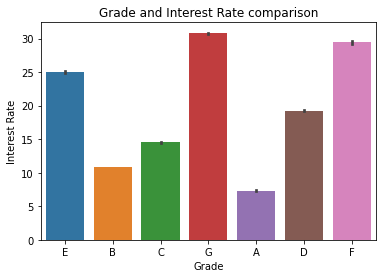

In [ ]:
sns.barplot(data=df, x="grade", y="int_rate")
plt.title('Grade and Interest Rate comparison')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


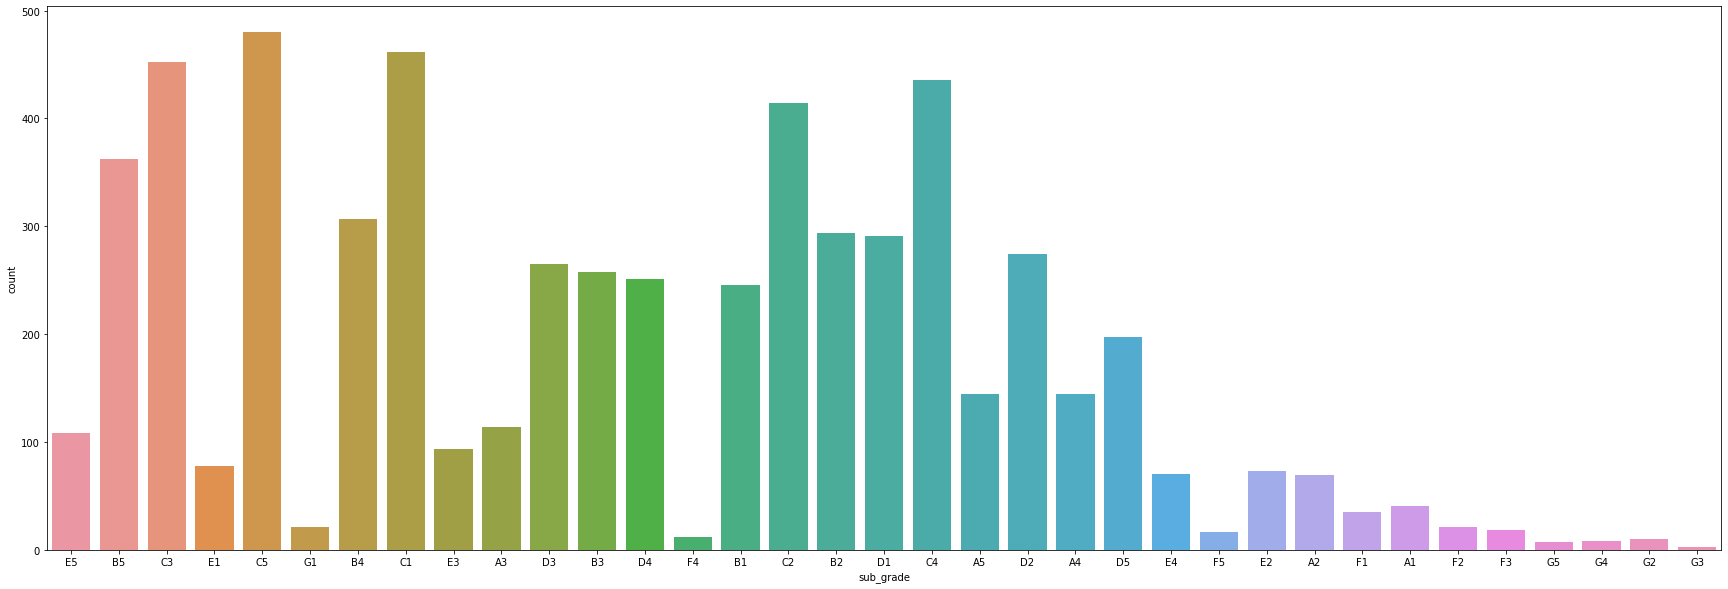

In [ ]:
sns.countplot(df['sub_grade'])
fig=plt.gcf()
fig.set_size_inches(30,10)

In [ ]:
y = df['installment' ]
x = df[['loan_amnt',]] #'int_rate'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


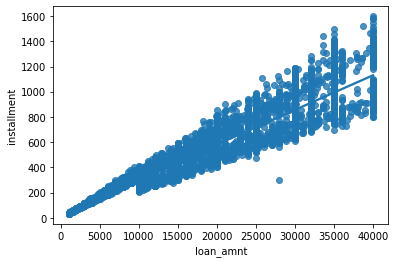

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)
sns.regplot(x,y)